In [1]:
import mpld3
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.decomposition import PCA
from astropy.table import Table

In [2]:
# helpers
def flagOn(value, flag):
    return (value & flag) == flag

In [3]:
# Create a dataset of all the lightcurves in s0017/0000/0000/0561
sample = []
labels = []
for path in glob('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/*/*.fits'):
    print(path)
    fits_file = fits.open(path)
    dat = Table.read(fits_file)
    pd = dat.to_pandas()
    print(pd.shape)
    # Filter out the points where bit 13 (2^12 = 4096) of the quality flag is on
    pd = pd[~flagOn(pd['QUALITY'], 4096)]
    print(pd.shape)
    
    sample.append(pd['SAP_FLUX'])
    labels.append(fits_file[0].header['OBJECT'])

/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5261/hlsp_qlp_tess_ffi_s0017-0000000005615261_tess_v01_llc.fits
(1130, 13)
(716, 13)
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4864/hlsp_qlp_tess_ffi_s0017-0000000005614864_tess_v01_llc.fits
(1130, 13)
(716, 13)
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4557/hlsp_qlp_tess_ffi_s0017-0000000005614557_tess_v01_llc.fits
(1130, 13)
(716, 13)
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4201/hlsp_qlp_tess_ffi_s0017-0000000005614201_tess_v01_llc.fits
(1130, 13)
(716, 13)
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5021/hlsp_qlp_tess_ffi_s0017-0000000005615021_tess_v01_llc.fits
(1130, 13)
(716, 13)
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4382/hlsp_qlp_tess_ffi_s0017-0000000005614382_tess_v01_llc.fits
(1130, 13)
(716, 13)
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4777/hlsp_qlp_tess_ffi_s0017-0000000005614777_tess_v01_llc.fits
(1130, 13)
(716, 13)
/srv/scratch/astro/z3529659/qlp/s0

In [26]:
len(labels)

110

In [12]:
from sklearn.impute import SimpleImputer
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)
imputed_sample = imp_constant.fit_transform(sample)

In [5]:
pca = PCA(n_components=2)
sample_after_pca = pca.fit(imputed_sample).transform(imputed_sample)

In [6]:
pca.explained_variance_ratio_

array([0.6962792 , 0.16816653], dtype=float32)

In [7]:

fig = plt.figure()
scatter = plt.scatter(
    sample_after_pca[:, 0], sample_after_pca[:, 1], s=5, label=labels
)

plt.title("PCA of lightcurves in s0017/0000/0000/0561")

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

Outliers are:
* (bottom right) TIC 5614834 https://exofop.ipac.caltech.edu/tess/target.php?id=5615395
* (top left) TIC 5615053 https://exofop.ipac.caltech.edu/tess/target.php?id=5615165

(0, 3.4)

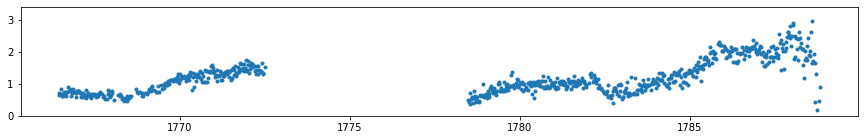

In [9]:
rando = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4834/hlsp_qlp_tess_ffi_s0017-0000000005614834_tess_v01_llc.fits')
dat = Table.read(rando)
pd = dat.to_pandas()
pd.shape
pd = pd[~flagOn(pd['QUALITY'], 4096)]
pd.shape

plt.figure(figsize=(15,2))
sf = pd['SAP_FLUX'].tolist()
t = pd['TIME'].tolist()

plt.plot(t, sf, '.')
plt.ylim(0, 3.4)

(-0.2, 2)

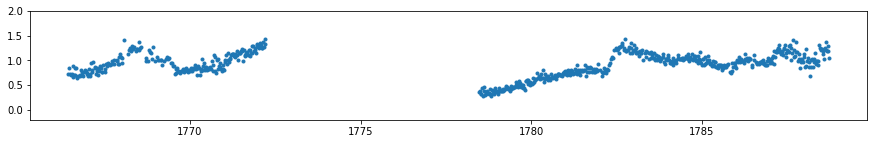

In [18]:
rando = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5053/hlsp_qlp_tess_ffi_s0017-0000000005615053_tess_v01_llc.fits')
dat = Table.read(rando)
pd = dat.to_pandas()
pd = pd[~flagOn(pd['QUALITY'], 4096) & ~flagOn(pd['QUALITY'], 2048)]

plt.figure(figsize=(15,2))
sf = pd['SAP_FLUX'].tolist()
t = pd['TIME'].tolist()

plt.plot(t, sf, '.')
plt.ylim(-0.2, 2)

(-0.2, 2)

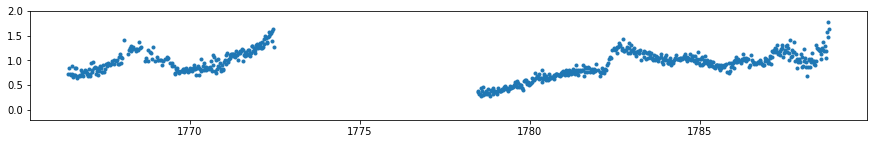

In [21]:
i = labels.index('TIC 5615053')

sf = imputed_sample[i].tolist()

rando = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5053/hlsp_qlp_tess_ffi_s0017-0000000005615053_tess_v01_llc.fits')
dat = Table.read(rando)
pd = dat.to_pandas()
pd = pd[~flagOn(pd['QUALITY'], 4096)]
t = pd['TIME'].tolist()

plt.figure(figsize=(15,2))
plt.plot(t, sf, '.')
plt.ylim(-0.2, 2)

(0.8, 1.2)

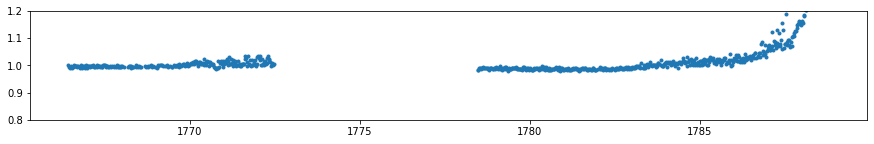

In [24]:
rando = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4132/hlsp_qlp_tess_ffi_s0017-0000000005614132_tess_v01_llc.fits')
dat = Table.read(rando)
pd = dat.to_pandas()
pd = pd[~flagOn(pd['QUALITY'], 4096)]

plt.figure(figsize=(15,2))
sf = pd['SAP_FLUX'].tolist()
t = pd['TIME'].tolist()

plt.plot(t, sf, '.')
plt.ylim(0.8, 1.2)

(0.95, 1.05)

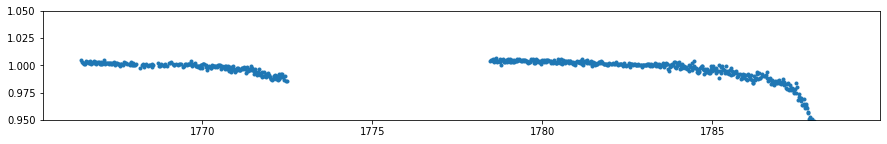

In [25]:
rando = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5454/hlsp_qlp_tess_ffi_s0017-0000000005615454_tess_v01_llc.fits')
dat = Table.read(rando)
pd = dat.to_pandas()
pd = pd[~flagOn(pd['QUALITY'], 4096)]

plt.figure(figsize=(15,2))
sf = pd['SAP_FLUX'].tolist()
t = pd['TIME'].tolist()

plt.plot(t, sf, '.')
plt.ylim(0.95, 1.05)